# Predictive Maintenance Project

In [1]:
# Import pandas, matplotlib and seaborn libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
# Import the excel data file
predictive_maintenance = pd.read_excel(r'C:\Users\Mr. Seedball\Desktop\Portfolio\Predictive maintenance\Predictive maintenance.xlsx', index_col = False)

In [3]:
# Display the first few rows to understand the data
print(predictive_maintenance.head())

   Vehicle_ID  Mileage  Age  Maintenance_Frequency Engine_Type  \
0           1   122958    7                      9      Diesel   
1           2   147867    4                      4      Diesel   
2           3   132932   13                     10      Diesel   
3           4   104694   13                      3      Diesel   
4           5   120879   10                      8      Petrol   

   Number_of_Repairs  Average_Repair_Cost  Critical_Failures  \
0                  7              1286.78                  1   
1                  4              1077.60                  4   
2                  4              1339.85                  3   
3                  1               458.33                  4   
4                  7               554.78                  2   

  Last_Maintenance_Type  Days_Since_Last_Maintenance Vehicle_Usage  \
0          Engine check                           34    Commercial   
1            Oil change                          288    Commercial   
2       

In [3]:
# Check for missing values
print(predictive_maintenance.isnull().sum())

Vehicle_ID                     0
Mileage                        0
Age                            0
Maintenance_Frequency          0
Engine_Type                    0
Number_of_Repairs              0
Average_Repair_Cost            0
Critical_Failures              0
Last_Maintenance_Type          0
Days_Since_Last_Maintenance    0
Vehicle_Usage                  0
Warning_Signals_Count          0
dtype: int64


In [4]:
# Check for duplicates
print(predictive_maintenance.duplicated().sum())

0


In [5]:
# Ensure correct data types
print(predictive_maintenance.dtypes)

Vehicle_ID                       int64
Mileage                          int64
Age                              int64
Maintenance_Frequency            int64
Engine_Type                     object
Number_of_Repairs                int64
Average_Repair_Cost            float64
Critical_Failures                int64
Last_Maintenance_Type           object
Days_Since_Last_Maintenance      int64
Vehicle_Usage                   object
Warning_Signals_Count            int64
dtype: object


# This project needs to answer five questions 


## Age, Mileage, and Maintenance - Question 1


## Impact of Vehicle Usage - Question 2


## Maintenance Needs by Engine Type - Question 3


## Warning Signals and Maintenance Severity - Question 4


## Time Since Last Maintenance - Question 5

### Question 1:	How do the age and mileage of a vehicle affect its maintenance frequency and the likelihood of critical failures?

In [6]:
# Analyzing correlation between age, mileage, and maintenance frequency
correlation_matrix = predictive_maintenance[['Age', 'Mileage', 'Maintenance_Frequency', 'Critical_Failures']].corr()
print(correlation_matrix)

                            Age   Mileage  Maintenance_Frequency  \
Age                    1.000000 -0.002135              -0.020716   
Mileage               -0.002135  1.000000              -0.008729   
Maintenance_Frequency -0.020716 -0.008729               1.000000   
Critical_Failures     -0.003519 -0.001105               0.000805   

                       Critical_Failures  
Age                            -0.003519  
Mileage                        -0.001105  
Maintenance_Frequency           0.000805  
Critical_Failures               1.000000  


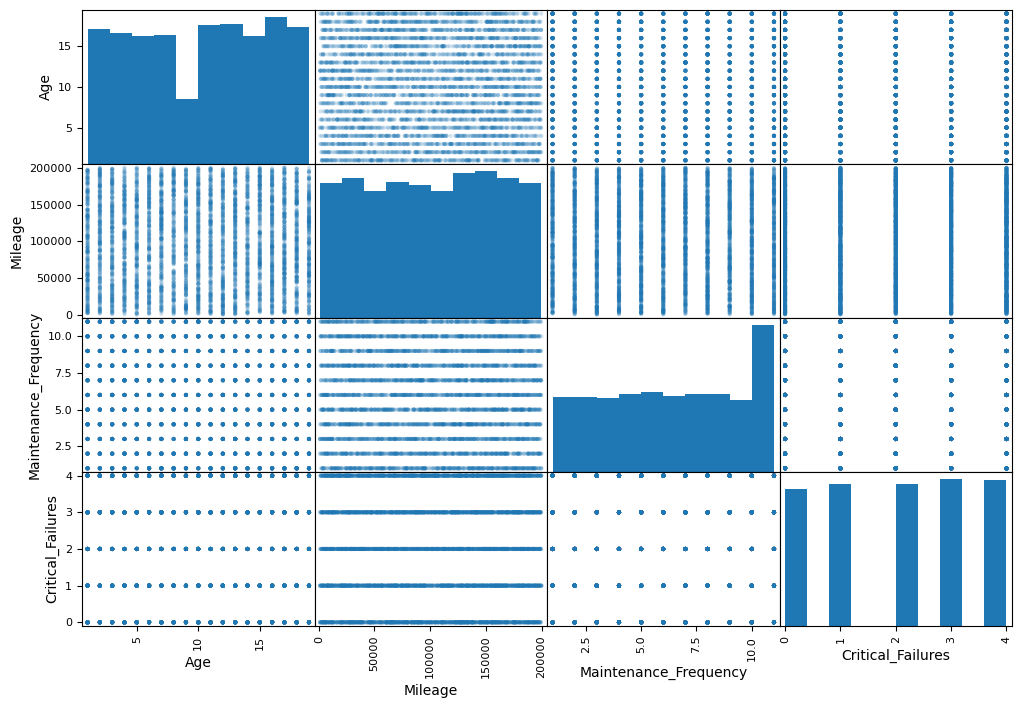

In [7]:
# Selecting the relevant columns for the scatter matrix
attributes = ['Age', 'Mileage', 'Maintenance_Frequency', 'Critical_Failures']
scatter_matrix(predictive_maintenance[attributes], figsize=(12, 8), alpha=0.2)
plt.show()

## Interpretation

### Weak correlations exist between these variables! In fact, they are almost negligible. 

### This implies that: age, mileage, maintenance frequency, critical failures do not impact each other

### Question 2: What is the impact of vehicle usage (personal vs. commercial) on the average repair cost and the number of repairs?

In [8]:
# Group by vehicle usage to analyze repair costs and number of repairs
usage_analysis = predictive_maintenance.groupby('Vehicle_Usage')[['Average_Repair_Cost', 'Number_of_Repairs']].mean()
print(usage_analysis)

               Average_Repair_Cost  Number_of_Repairs
Vehicle_Usage                                        
Commercial              769.180913           4.501269
Personal                787.885910           4.420285


## Interpretation

### Commercial vehicles cost more (765Eur) compared to private (788Eur), but the frequency of repair in private (4.42) is slightly lower compared to commercial (4.50). 

### For owners and operators, understanding these differences can inform budgeting for maintenance costs. Businesses using commercial vehicles may anticipate more frequent repairs but can also expect slightly lower costs per repair. In contrast, rivate users might face repairs less frequently but with a higher cost per instance. These emphasize on the importance of preventive maintenance and budget planning.

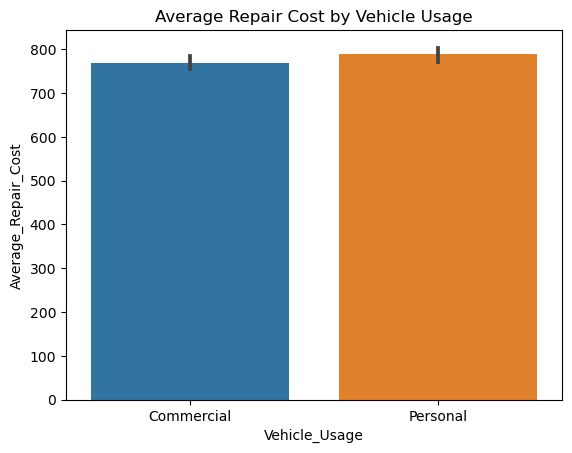

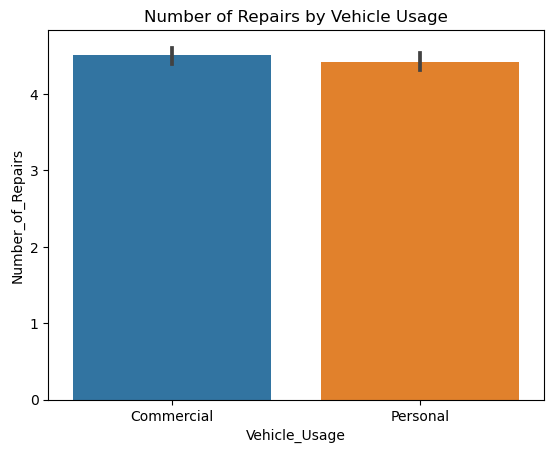

In [9]:
# Average Repair Cost by Vehicle Usage
sns.barplot(x='Vehicle_Usage', y='Average_Repair_Cost', data=predictive_maintenance)
plt.title('Average Repair Cost by Vehicle Usage')
plt.show()

# Number of Repairs by Vehicle Usage
sns.barplot(x='Vehicle_Usage', y='Number_of_Repairs', data=predictive_maintenance)
plt.title('Number of Repairs by Vehicle Usage')
plt.show()

### Question 3.	Are there significant differences in maintenance needs and costs between different engine types (e.g., Petrol, diesel, electric, hybrid)?

In [10]:
# Analyzing differences in maintenance needs and costs by engine type
engine_type_analysis = predictive_maintenance.groupby('Engine_Type')[['Maintenance_Frequency', 'Average_Repair_Cost']].mean()
print(engine_type_analysis)

             Maintenance_Frequency  Average_Repair_Cost
Engine_Type                                            
Diesel                    5.955829           782.203780
Electric                  5.854467           786.746780
Hybrid                    6.045255           768.916212
Petrol                    6.016899           775.989904


### Diesel and electric engine vehicles exhibit lower maintenance frequencies but incur slightly higher repair costs, with electric engines being the most expensive to repair. Hybrid engines, despite requiring the most frequent maintenance, benefit from the lowest average repair costs, suggesting efficient repair management. 

### Petrol engines maintain a middle ground, with a maintenance frequency and repair cost that are neither the highest nor the lowest. Overall, the choice of engine type influences both the frequency of maintenance required and the associated repair costs, highlighting the trade-offs between different vehicle technologies.

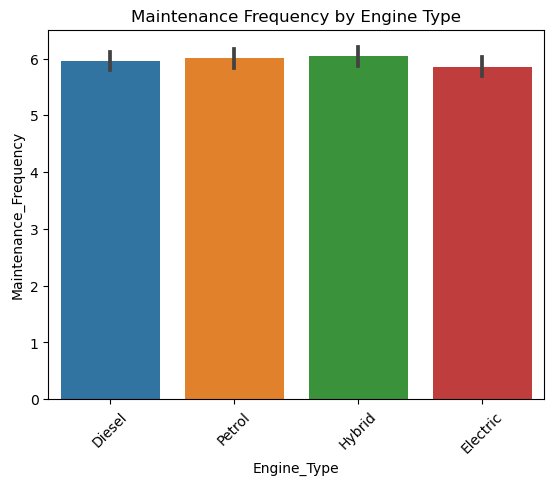

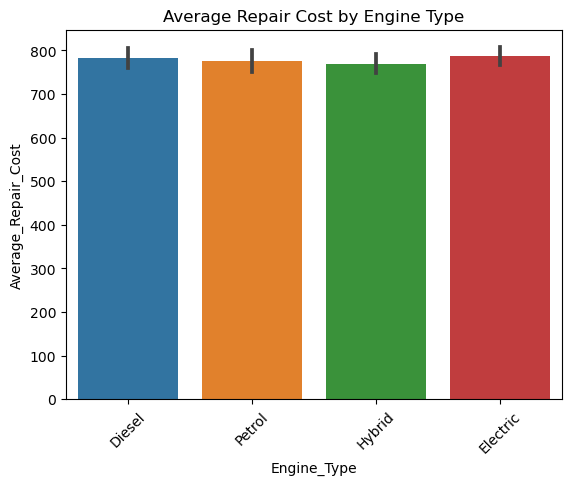

In [11]:
# Maintenance frequency by engine type
sns.barplot(x='Engine_Type', y='Maintenance_Frequency', data=predictive_maintenance)
plt.title('Maintenance Frequency by Engine Type')
plt.xticks(rotation=45)
plt.show()

# Average repair Cost by engine type
sns.barplot(x='Engine_Type', y='Average_Repair_Cost', data=predictive_maintenance)
plt.title('Average Repair Cost by Engine Type')
plt.xticks(rotation=45)
plt.show()

### Question 4: Can the number of warning signals before maintenance predict the severity of maintenance required or the occurrence of critical failures?

In [12]:
# Correlation between warning signals count and maintenance severity
signal_correlation = predictive_maintenance[['Warning_Signals_Count', 'Critical_Failures']].corr()
print(signal_correlation)

                       Warning_Signals_Count  Critical_Failures
Warning_Signals_Count               1.000000           0.013499
Critical_Failures                   0.013499           1.000000


### The correlation coefficient of 0.013499 between Warning Signals Count and Critical Failures suggests a very weak positive linear relationship, indicating that an increase in the count of warning signals is marginally associated with an increase in critical failures, though the effect is nearly negligible.

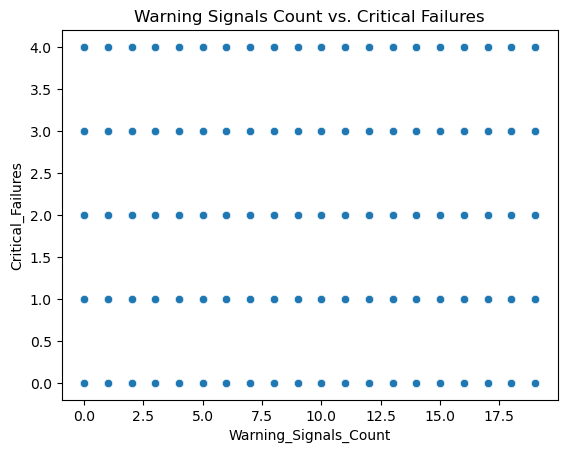

In [13]:
sns.scatterplot(x='Warning_Signals_Count', y='Critical_Failures', data=predictive_maintenance)
plt.title('Warning Signals Count vs. Critical Failures')
plt.show()

### Question 5:	How does the time elapsed since the last maintenance (days since last maintenance) correlate with the vehicle's overall maintenance and repair history (including costs and critical failures)?

In [14]:
# Correlation analysis
time_since_last_maintenance_correlation = predictive_maintenance[['Days_Since_Last_Maintenance', 'Critical_Failures', 'Average_Repair_Cost']].corr()
print(time_since_last_maintenance_correlation)

                             Days_Since_Last_Maintenance  Critical_Failures  \
Days_Since_Last_Maintenance                     1.000000          -0.008281   
Critical_Failures                              -0.008281           1.000000   
Average_Repair_Cost                             0.003552           0.027415   

                             Average_Repair_Cost  
Days_Since_Last_Maintenance             0.003552  
Critical_Failures                       0.027415  
Average_Repair_Cost                     1.000000  


### The correlation matrix indicates that Days Since Last Maintenance has a very weak negative correlation with Critical Failures (-0.008281), suggesting almost no linear relationship between the time since last maintenance and the occurrence of critical failures. Additionally, there is a very weak positive correlation between Days Since Last Maintenance and Average Repair Cost (0.003552), and a slightly stronger but still weak positive correlation between Critical Failures and Average Repair Cost (0.027415), indicating that as the number of critical failures increases, the average repair cost tends to slightly increase as well, though the effect is minimal.

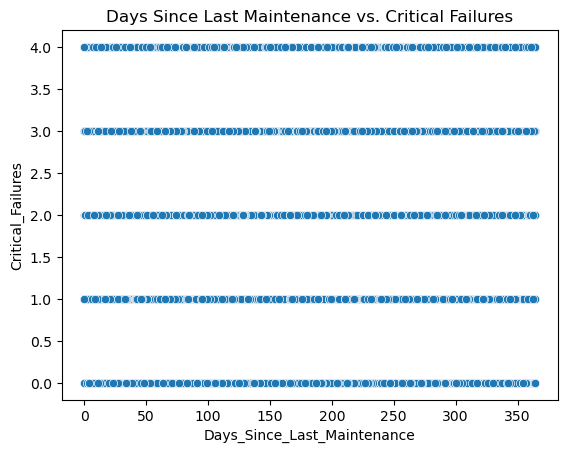

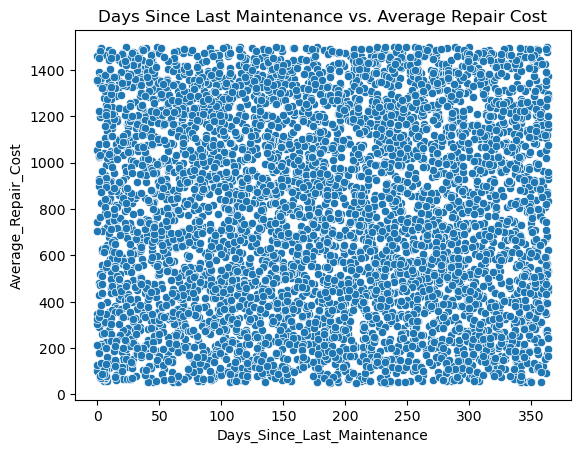

In [15]:
# Scatter plot for Days Since Last Maintenance vs. Critical Failures
sns.scatterplot(x='Days_Since_Last_Maintenance', y='Critical_Failures', data=predictive_maintenance)
plt.title('Days Since Last Maintenance vs. Critical Failures')
plt.show()

# Scatter plot for Days Since Last Maintenance vs. Average Repair Cost
sns.scatterplot(x='Days_Since_Last_Maintenance', y='Average_Repair_Cost', data=predictive_maintenance)
plt.title('Days Since Last Maintenance vs. Average Repair Cost')
plt.show()

# The end